<a href="https://colab.research.google.com/github/Shivamthakur7500/EarthQuack_EDA-project/blob/main/project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA COLLECTION


In [ ]:
# prompt: how to load data from a google drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/project data.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Preprocessing


In [ ]:
df = pd.read_csv(file_path)
df.head() # Display the first few rows of the DataFrame


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-21T15:46:59.478Z,-56.1274,-27.9666,115.188,5.1,mb,42.0,69.0,5.218,0.89,...,2025-04-21T16:06:18.040Z,South Sandwich Islands region,earthquake,11.40,7.696,0.090,40.0,reviewed,us,us
1,2025-04-21T15:18:15.745Z,62.2263,-151.0108,66.400,2.8,ml,NaN,NaN,NaN,0.38,...,2025-04-21T15:20:07.932Z,"32 km SSW of Petersville, Alaska",earthquake,NaN,0.800,NaN,NaN,automatic,ak,ak
2,2025-04-21T11:39:16.048Z,61.6038,-146.7293,27.100,2.6,ml,NaN,NaN,NaN,0.38,...,2025-04-21T12:41:05.040Z,"43 km S of Nelchina, Alaska",earthquake,NaN,0.200,NaN,NaN,automatic,ak,ak
3,2025-04-21T10:42:04.429Z,30.1653,51.9590,10.000,4.4,mb,45.0,89.0,6.421,1.28,...,2025-04-21T12:45:55.040Z,"42 km E of Nūrābād, Iran",earthquake,9.78,1.953,0.085,40.0,reviewed,us,us
4,2025-04-21T09:28:18.664Z,-18.2225,-178.1082,560.233,4.4,mb,54.0,75.0,2.968,0.83,...,2025-04-21T09:54:24.040Z,"273 km E of Levuka, Fiji",earthquake,12.96,7.631,0.053,102.0,reviewed,us,us


In [ ]:
df.shape

(6386, 22)

In [ ]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,6386.000000,6386.000000,6386.000000,6386.000000,5841.000000,5841.000000,5841.000000,6386.000000,5780.000000,6386.000000,5811.000000,5835.000000
mean,20.845731,-27.437061,62.400313,3.874851,44.076186,132.281332,2.382639,0.620510,6.822181,4.578370,0.114783,37.237189
std,30.062549,125.095147,111.798733,0.854196,37.220606,72.138740,3.934430,0.287316,4.335676,13.988455,0.055895,53.505464
min,-73.220400,-179.996800,-2.950000,2.500000,3.000000,11.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,-4.709750,-151.947325,10.000000,3.000000,19.000000,75.000000,0.539000,0.420000,3.990000,1.822000,0.077000,12.000000
50%,27.487700,-66.963483,15.105000,4.200000,32.000000,115.000000,1.318000,0.630000,6.445000,1.970000,0.105000,21.000000
75%,48.234650,119.392875,60.851250,4.500000,55.000000,186.000000,2.657000,0.820000,9.450000,6.645500,0.141000,40.000000
max,86.322700,179.985500,650.629000,7.700000,437.000000,353.000000,52.015000,2.100000,40.010000,1026.000000,0.530000,802.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6386 entries, 0 to 6385
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             6386 non-null   object 
 1   latitude         6386 non-null   float64
 2   longitude        6386 non-null   float64
 3   depth            6386 non-null   float64
 4   mag              6386 non-null   float64
 5   magType          6386 non-null   object 
 6   nst              5841 non-null   float64
 7   gap              5841 non-null   float64
 8   dmin             5841 non-null   float64
 9   rms              6386 non-null   float64
 10  net              6386 non-null   object 
 11  id               6386 non-null   object 
 12  updated          6386 non-null   object 
 13  place            6386 non-null   object 
 14  type             6386 non-null   object 
 15  horizontalError  5780 non-null   float64
 16  depthError       6386 non-null   float64
 17  magError      

In [ ]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,545
gap,545
dmin,545
rms,0


In [ ]:
import numpy as np

useless_col=list(df.columns[10:13]) + [df.columns[14]] + [df.columns[19]] +list(df.columns[21:])
# useless_col=useless_col.pop(5)
print(useless_col)
df=df.drop(useless_col,axis=1)
df



['net', 'id', 'updated', 'type', 'status', 'magSource']


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,place,horizontalError,depthError,magError,magNst,locationSource
0,2025-04-21T15:46:59.478Z,-56.1274,-27.9666,115.188,5.1,mb,42.0,69.0,5.218,0.89,South Sandwich Islands region,11.40,7.696,0.090,40.0,us
1,2025-04-21T15:18:15.745Z,62.2263,-151.0108,66.400,2.8,ml,NaN,NaN,NaN,0.38,"32 km SSW of Petersville, Alaska",NaN,0.800,NaN,NaN,ak
2,2025-04-21T11:39:16.048Z,61.6038,-146.7293,27.100,2.6,ml,NaN,NaN,NaN,0.38,"43 km S of Nelchina, Alaska",NaN,0.200,NaN,NaN,ak
3,2025-04-21T10:42:04.429Z,30.1653,51.9590,10.000,4.4,mb,45.0,89.0,6.421,1.28,"42 km E of Nūrābād, Iran",9.78,1.953,0.085,40.0,us
4,2025-04-21T09:28:18.664Z,-18.2225,-178.1082,560.233,4.4,mb,54.0,75.0,2.968,0.83,"273 km E of Levuka, Fiji",12.96,7.631,0.053,102.0,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,2025-01-14T01:31:39.719Z,9.0032,39.9748,10.000,4.6,mb,39.0,134.0,1.284,0.59,"13 km NNE of Metahāra, Ethiopia",9.36,1.951,0.103,28.0,us
6382,2025-01-14T00:43:08.674Z,40.5387,63.3168,16.860,4.2,mb,32.0,130.0,3.389,0.62,"46 km NNW of Gazli, Uzbekistan",9.61,6.730,0.200,7.0,us
6383,2025-01-14T00:33:06.911Z,50.7625,-177.1957,10.000,3.4,ml,21.0,235.0,1.001,0.29,"129 km SSW of Adak, Alaska",4.64,1.950,0.097,14.0,us
6384,2025-01-14T00:23:29.517Z,-20.2622,-69.2372,91.224,4.6,mb,44.0,144.0,0.592,0.53,"44 km E of La Tirana, Chile",5.35,3.813,0.077,50.0,us


In [ ]:
df.shape

(6386, 16)

In [ ]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,545
gap,545
dmin,545
rms,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df=df.dropna()
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0


In [ ]:
df.shape

(5755, 16)

In [ ]:
df.size

92080

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5755 entries, 0 to 6385
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5755 non-null   object 
 1   latitude         5755 non-null   float64
 2   longitude        5755 non-null   float64
 3   depth            5755 non-null   float64
 4   mag              5755 non-null   float64
 5   magType          5755 non-null   object 
 6   nst              5755 non-null   float64
 7   gap              5755 non-null   float64
 8   dmin             5755 non-null   float64
 9   rms              5755 non-null   float64
 10  place            5755 non-null   object 
 11  horizontalError  5755 non-null   float64
 12  depthError       5755 non-null   float64
 13  magError         5755 non-null   float64
 14  magNst           5755 non-null   float64
 15  locationSource   5755 non-null   object 
dtypes: float64(12), object(4)
memory usage: 764.3+ KB


In [ ]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000
mean,16.917824,-14.615369,65.027778,3.976712,44.043093,132.571851,2.414520,0.626902,6.847606,4.727774,0.113458,37.627454
std,28.965657,124.231870,116.601806,0.823573,36.929978,72.008456,3.954842,0.291606,4.325738,4.998544,0.053450,53.765369
min,-73.220400,-179.996600,-2.950000,2.500000,3.000000,11.000000,0.000000,0.000000,0.070000,0.090000,0.000000,0.000000
25%,-6.273200,-124.655000,10.000000,3.200000,20.000000,75.000000,0.560550,0.420000,4.040000,1.872000,0.077000,12.000000
50%,19.307500,-62.757700,14.520000,4.200000,32.000000,115.000000,1.340200,0.640000,6.460000,2.001000,0.105000,21.000000
75%,39.504400,123.441400,61.978500,4.500000,55.000000,186.000000,2.692000,0.830000,9.475000,7.080500,0.140000,40.000000
max,86.322700,179.985500,650.629000,7.700000,437.000000,353.000000,52.015000,1.860000,40.010000,37.850000,0.530000,802.000000


In [ ]:
df.duplicated().sum()

np.int64(1)

## DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5755 entries, 0 to 6385
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5755 non-null   object 
 1   latitude         5755 non-null   float64
 2   longitude        5755 non-null   float64
 3   depth            5755 non-null   float64
 4   mag              5755 non-null   float64
 5   magType          5755 non-null   object 
 6   nst              5755 non-null   float64
 7   gap              5755 non-null   float64
 8   dmin             5755 non-null   float64
 9   rms              5755 non-null   float64
 10  place            5755 non-null   object 
 11  horizontalError  5755 non-null   float64
 12  depthError       5755 non-null   float64
 13  magError         5755 non-null   float64
 14  magNst           5755 non-null   float64
 15  locationSource   5755 non-null   object 
dtypes: float64(12), object(4)
memory usage: 764.3+ KB


In [ ]:
import plotly.express as px

fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',

                     color='mag',
                     color_continuous_scale='Viridis',
                     title='Global Earthquake Locations by Magnitude')
fig.show()


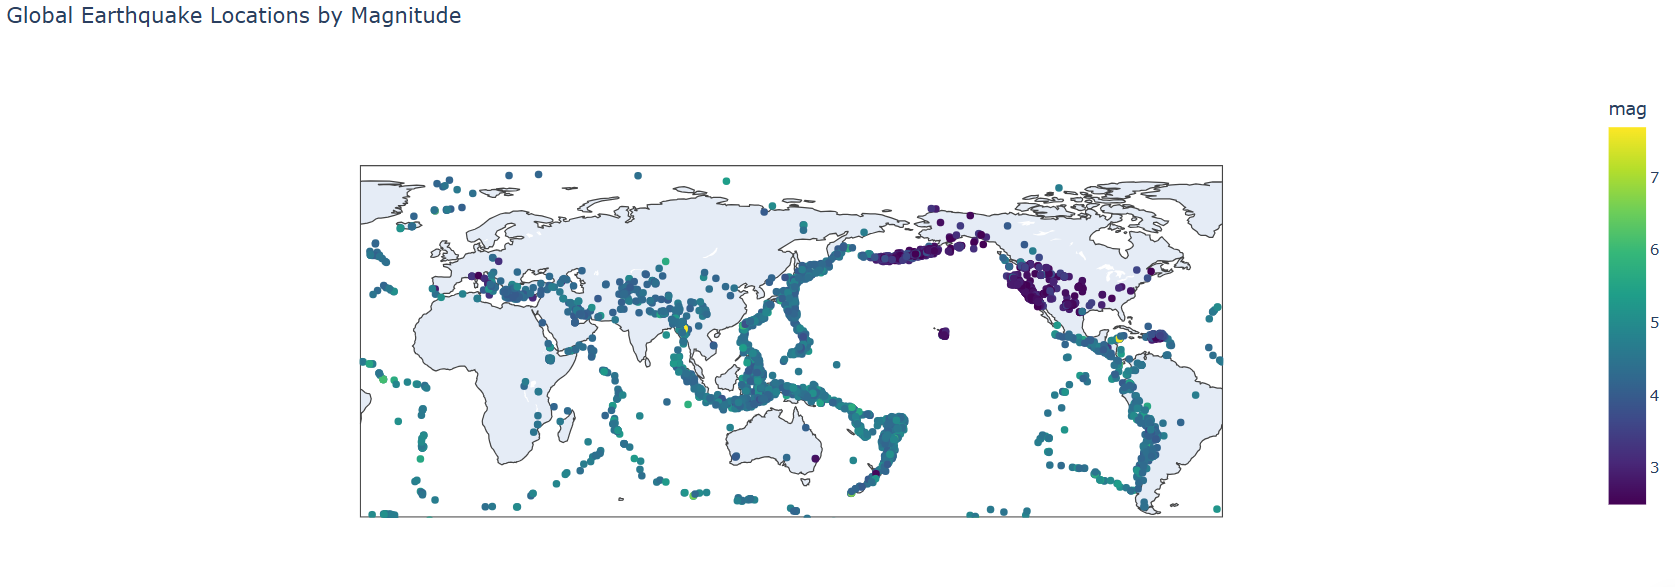

---
##CONCLUSION
Here From the above graph we can conclude that number of earthquack occurs as per it latitude and longitude
we can say that :
1. The most earthquack prone Area is  "Indo- Pacific Region".


*   More - precisely


    1. ("Sagaing, Myanmar (Burma)" latitude = 22.0014 , longitude = 95.9247 ,  mag = 7.7 )    
2. The second most EarthQuack prone area is "European Region".
---


0         (4.58, 5.1]
3        (4.06, 4.58]
4        (4.06, 4.58]
5         (5.1, 5.62]
6       (2.495, 3.02]
            ...      
6381      (4.58, 5.1]
6382     (4.06, 4.58]
6383     (3.02, 3.54]
6384      (4.58, 5.1]
6385     (3.54, 4.06]
Name: mag, Length: 5755, dtype: category
Categories (10, interval[float64, right]): [(2.495, 3.02] < (3.02, 3.54] < (3.54, 4.06] <
                                            (4.06, 4.58] ... (5.62, 6.14] < (6.14, 6.66] <
                                            (6.66, 7.18] < (7.18, 7.7]] 0        (62.408, 127.766]
3         (-3.604, 62.408]
4       (519.913, 585.271]
5         (-3.604, 62.408]
6         (-3.604, 62.408]
               ...        
6381      (-3.604, 62.408]
6382      (-3.604, 62.408]
6383      (-3.604, 62.408]
6384     (62.408, 127.766]
6385      (-3.604, 62.408]
Name: depth, Length: 5755, dtype: category
Categories (10, interval[float64, right]): [(-3.604, 62.408] < (62.408, 127.766] <
                                         

<ipython-input-275-86f678a0fee4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-275-86f678a0fee4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-275-86f678a0fee4>:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



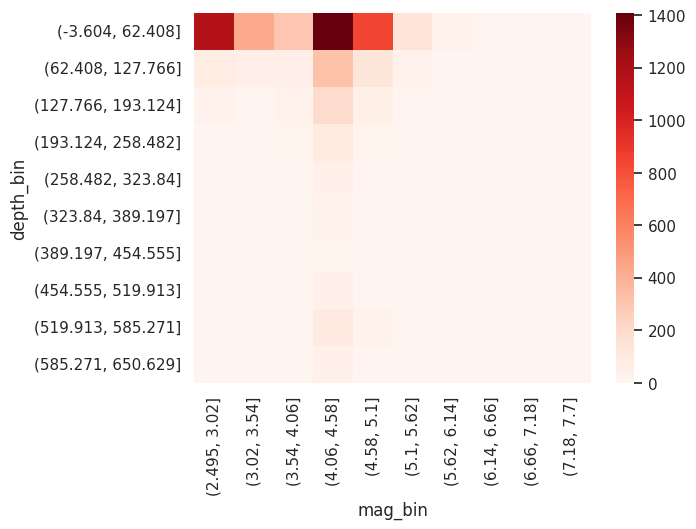

<Figure size 600x1000 with 0 Axes>

In [ ]:
mag_range=pd.cut(df['mag'],bins=10);
depth_range=pd.cut(df['depth'],bins=10);
print(mag_range,depth_range)
df['mag_bin'] = mag_range
df['depth_bin'] = depth_range
pivot = df.pivot_table(index='depth_bin', columns='mag_bin', aggfunc='size', fill_value=0)
sns.heatmap(pivot,cmap='Reds')
plt.figure(figsize=(6,10))
plt.show()

---
##Conclusion
Here From the above graph we can conclude that number of earthquack occurs as per Magnitude Intensity vs Depth Of the EarthQuack Surface we can say that :
  1. Here we can see that the maximum Magnitude Intensity occurs in the Depth ranges from (4.06 - 4.58) and (-3.604 - 62.408) respectively.
  
---


---
##Disaster visulaization on the basis of 'DISASTER COUNT' as per "LOCATIONS"

## Abbreviation Key:

- **ci** : *California Integrated Seismic Network (CISN)*
- **hv** : *Hawaii Volcano Observatory (HVO)*
- **us** : *United States Geological Survey (USGS)*
- **ak** : *Alaska Earthquake Center (AEC)*
- **nc** : *Northern California Seismic System (NCSS)*
- **uu** : *University of Utah Seismograph Stations*
- **mb** : *Montana Bureau of Mines and Geology*
- **nm** : *New Madrid Seismic Zone Network*
- **ok** : *Oklahoma Geological Survey*
- **pr** : *Puerto Rico Seismic Network*
- **se** : *South Eastern U.S. Network*










0     1.240017
1     0.872215
2     2.133249
3     0.000000
4     4.319042
5     0.010509
6     1.250525
7    50.000000
8     0.147121
9     0.294241
dtype: float64 

locationSource
ci     120
hv      85
nc     205
nm       2
pr     413
se       3
tx     121
us    4760
uu      16
uw      30
Name: count, dtype: int64 



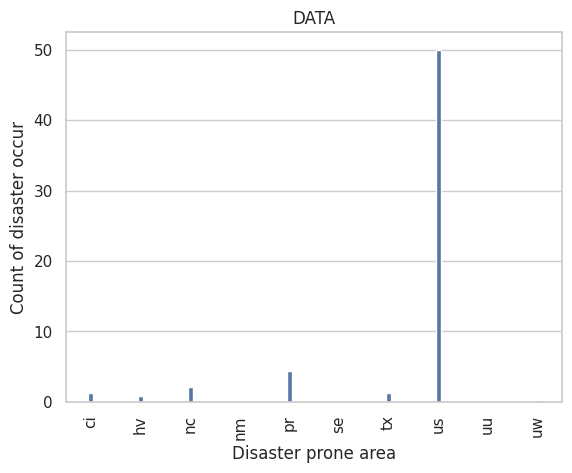

In [379]:
data=df.groupby(df['locationSource'])['locationSource'].value_counts()
def normalization(series,mini,maxi):
  min_series = series.min()
  max_series = series.max()
  normailized_data= (series - min_series) / (max_series - min_series) * ((maxi - mini) + mini)*5

  return normailized_data
# Store the result of the normalization function in the 'normailized_data' variable
normailized_data = normalization(pd.Series([i for i in data]),1,10)
print(normailized_data,'\n')
print(data,'\n')
sns.barplot(x=data.index,y=normailized_data,width=.1)
plt.xticks(rotation=90)
plt.xlabel("Disaster prone area")
plt.ylabel("Count of disaster occur")
plt.title("DATA")
plt.show()

---
##CONCLUSION
Here From the above graph we can conclude that Disaster visulaization on the basis of 'DISASTER COUNT' as per "LOCATIONS" we can say that :

1.   We can Conclude that ***US*** (***United States Geological Survey (USGS)***) have the highest disaster count .

2.   The second maximum Disaster Prone location is ***Ps*** (***Puerto Rico Seismic Network***).

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5755 entries, 0 to 6385
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   time             5755 non-null   object  
 1   latitude         5755 non-null   float64 
 2   longitude        5755 non-null   float64 
 3   depth            5755 non-null   float64 
 4   mag              5755 non-null   float64 
 5   magType          5755 non-null   object  
 6   nst              5755 non-null   float64 
 7   gap              5755 non-null   float64 
 8   dmin             5755 non-null   float64 
 9   rms              5755 non-null   float64 
 10  place            5755 non-null   object  
 11  horizontalError  5755 non-null   float64 
 12  depthError       5755 non-null   float64 
 13  magError         5755 non-null   float64 
 14  magNst           5755 non-null   float64 
 15  locationSource   5755 non-null   object  
 16  mag_bin          5755 non-null   category
 17  

---
##Data Visulaization on the basis of location source as per number of events  

<ipython-input-281-403d85eff1c3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-281-403d85eff1c3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



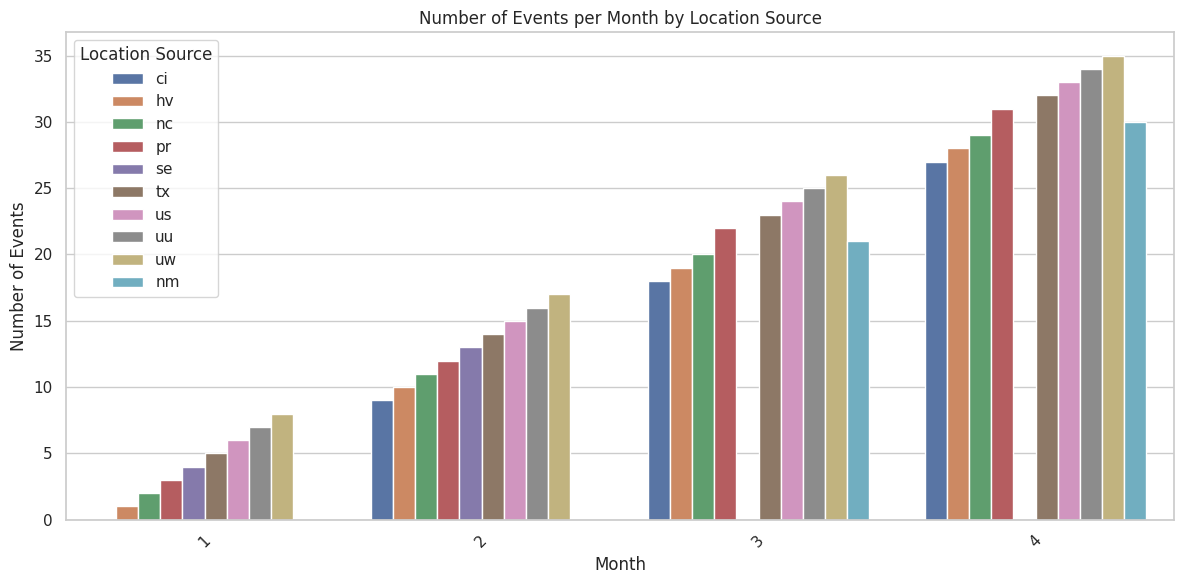

In [ ]:

df['time'] = pd.to_datetime(df['time'])


df['month'] = df['time'].dt.month


monthly_events = df.groupby(['month', 'locationSource']).size().reset_index(name='event_count')


plt.figure(figsize=(12, 6))
sns.barplot(x='month', y=monthly_events.index, hue='locationSource', data=monthly_events)
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.title('Number of Events per Month by Location Source')
plt.xticks(rotation=45)
plt.legend(title='Location Source')
plt.tight_layout()
plt.show()


---
##CONCLUSION
Here From the above graph we can conclude that Data Visulaization on the basis of location source as per number of events we can say that:


1.   In 1st Month we have "uw" as the Highest event holder among others with "hv" as the Lowest event holder.
2.  In 2nd Month we have "uw" as the Highest event holder among others with "ci" as the Lowest event holder.

1.  In 3rd Month we have "uw" as the Highest event holder among others with "ci" as the Lowest event holder.
2. In 4th Month we have "uw" as the Highest event holder among others with "ci" as the Lowest event holder.
---




---
##Data visualization on Intensity of Earthqauck for each Location Source
---

<ipython-input-380-6c4d2e228e22>:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



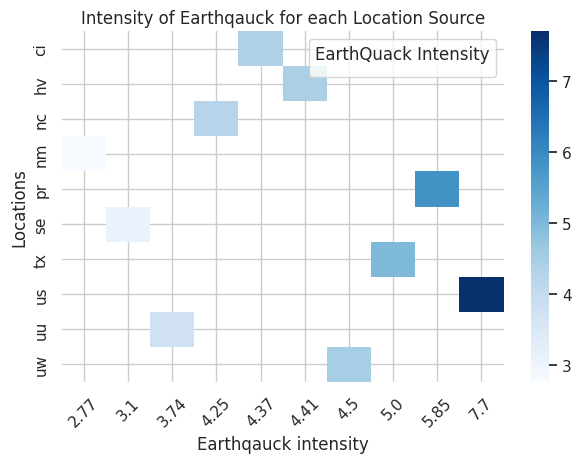

<Figure size 200x200 with 0 Axes>

In [380]:
max_magnitude=df.groupby('locationSource')['mag'].max().reset_index()

heatmap_data = max_magnitude.pivot(index='locationSource', columns='mag', values='mag')
sns.heatmap(heatmap_data,cmap="Blues")
plt.ylabel('Locations')
plt.xlabel('Earthqauck intensity')
plt.title('Intensity of Earthqauck for each Location Source')
plt.xticks(rotation=45)
plt.legend(title='EarthQuack Intensity')
plt.tight_layout()
plt.figure(figsize=(2,2))
plt.show()


---
##CONCLUSION
Here From the above graph we can conclude that Intensity of Earthqauck for each Location Source we can say that:


1.   US have the EarthQuack with the Highest Intensity of 7.7.  
2.   NM have the EarthQuack with the Lowest Intensity of 2.77.  

---

---
##Division of continent on the basis of latitude and longitude.
---

In [ ]:
# prompt: how to divide the locations in continents on the basis of latitude and llongitude

def assign_continent(latitude, longitude):
    """Assigns a continent based on latitude and longitude."""

    if -90 <= latitude <= 90 and -180 <= longitude <= 180:  # Basic validation
        if latitude >= -35 and latitude <= 35 : # Approximate bounds for Africa
            if longitude <= 50 and longitude >= -20:
                return 'Africa'

        # ... Add more continent checks similarly using latitude and longitude ranges
        elif latitude >= 35: # Northen Hemisphere
            if longitude <= 180 and longitude >= -180: # All longitude
                if longitude <= 50:
                  return 'Europe'
                else:
                  return 'Asia'

        elif latitude <= -35:
            return 'Antartica'
        elif latitude >=-60 and latitude <=10:
             if longitude >=-115.42:
              return 'south America'
        else:
          return "Other"
    else:
        return 'Unknown' # Handle invalid coordinates


df['continent'] = df.apply(lambda row: assign_continent(row['latitude'], row['longitude']), axis=1)



<ipython-input-283-03343ebb33ff>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



---
##CONCLUSION
Here From the above graph we can conclude that Division of continent on the basis of latitude and longitude we can say that:

Here we define the continent on basis of latitude and longitude .

##Continents Such as
1. Africa.   
2. Europe.
3. Asia.
4. South America.


---

---
 ## Distribution of Earthquakes by Continent

 ## Overall Distribution

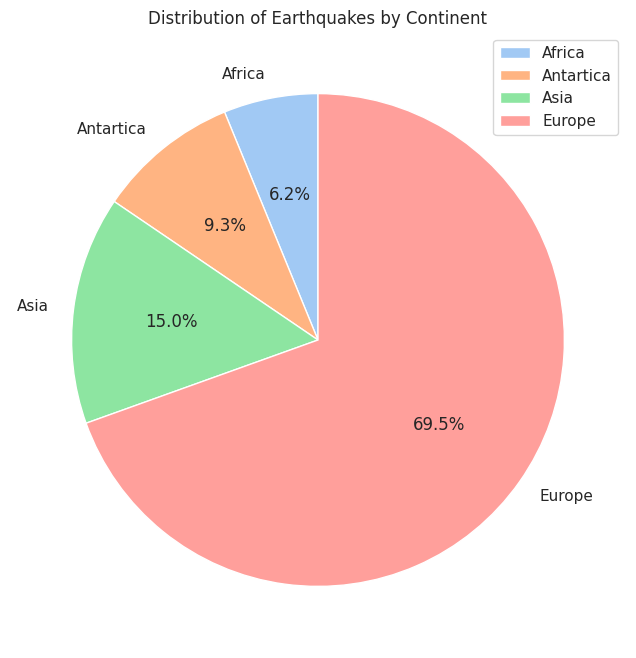

In [ ]:
continent_based=df.groupby('continent')['mag'].count()
continent_based
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(continent_based, labels=continent_based.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Earthquakes by Continent')
plt.legend()
plt.show()

---
##CONCLUSION
Here From the above graph we can conclude that Distribution of Earthquakes by Continent we can say that:



1.  Here we can conclude that the "EUROPE" has the maximum number of events (approx. 69.5%) Occured (as per the dataset).
2.   Further we have 15% , 9.3% , 6.2% with respect to  Asia , Antartica ,Africa respectively.   

---

---
##Distribution on the basis of (maximum magnitude Inensity)
---

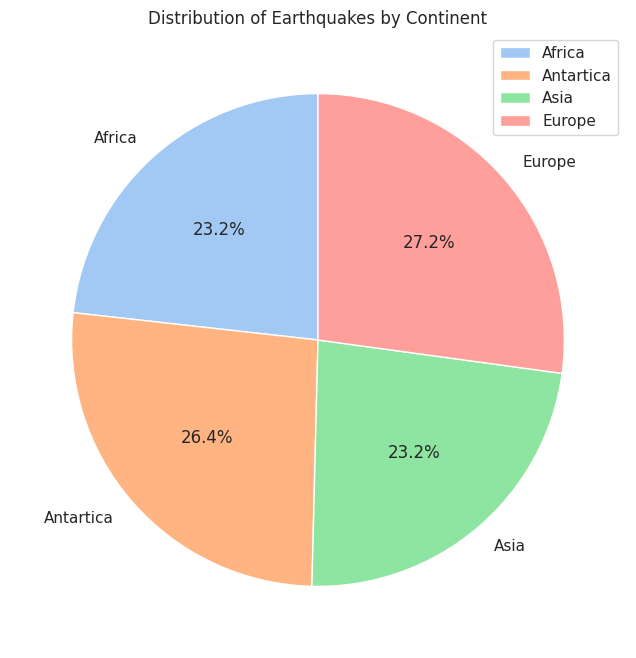

In [ ]:
continent_max_intensity=df.groupby('continent')['mag'].max()
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
sns.set_palette("pastel")  # Optional: Set a color palette
plt.pie(continent_max_intensity, labels=continent_max_intensity.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Earthquakes by Continent')
plt.legend()
plt.show()

---
##CONCLUSION


In [ ]:
df.head().info()


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 6
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             5 non-null      datetime64[ns, UTC]
 1   latitude         5 non-null      float64            
 2   longitude        5 non-null      float64            
 3   depth            5 non-null      float64            
 4   mag              5 non-null      float64            
 5   magType          5 non-null      object             
 6   nst              5 non-null      float64            
 7   gap              5 non-null      float64            
 8   dmin             5 non-null      float64            
 9   rms              5 non-null      float64            
 10  place            5 non-null      object             
 11  horizontalError  5 non-null      float64            
 12  depthError       5 non-null      float64            
 13  magError         5 non-null  

##MACHINE LEARNING
##Model Manufacturing


In [ ]:
import numpy as np
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
x=np.array(df[['mag']])
y=np.array(df['depth'])

# print(df['mag'].corr(df['depth'],method='spearman'  ))


In [ ]:
# Option: Remove outliers beyond 3 standard deviations
from scipy import stats
import numpy as np

# Select only numerical features for z-score calculation
numerical_features = df.select_dtypes(include=np.number)

z_scores = np.abs(stats.zscore(numerical_features))
# Replace df_clean with df
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print(df_no_outliers.count())

time               5000
latitude           5000
longitude          5000
depth              5000
mag                5000
magType            5000
nst                5000
gap                5000
dmin               5000
rms                5000
place              5000
horizontalError    5000
depthError         5000
magError           5000
magNst             5000
locationSource     5000
mag_bin            5000
depth_bin          5000
month              5000
continent          2227
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df_no_outliers.select_dtypes(include=np.number)
X_scaled = scaler.fit_transform(numerical_features.drop(columns=['mag']))
y = df_no_outliers['mag']

y

,mag
0,5.10
3,4.40
6,2.76
7,2.88
8,4.50
...,...
6381,4.60
6382,4.20
6383,3.40
6384,4.60


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_scaled is your scaled features from previous code
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly = poly.fit_transform(X_scaled)

# Use cross-validation to pick the best alpha
ridge = RidgeCV(alphas=[0.01, 0.1, 1, 10])
ridge.fit(X_poly, y)
y_pred_ridge = ridge.predict(X_poly)

In [ ]:
import pandas as pd

feature_names = poly.get_feature_names_out(numerical_features.drop(columns=['mag']).columns)
coeffs = pd.Series(ridge.coef_, index=feature_names).sort_values(ascending=False)
print(coeffs.head(10))  # Top influencing features


nst                  0.282973
horizontalError      0.164850
rms                  0.121316
dmin                 0.111354
longitude            0.110678
latitude magError    0.083419
magError magNst      0.075002
gap depthError       0.065295
magError             0.052555
rms magError         0.043396
dtype: float64


In [ ]:
model=LinearRegression()
model

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
ridge.fit(X_train, y_train)
y_pred_test = ridge.predict(X_test)




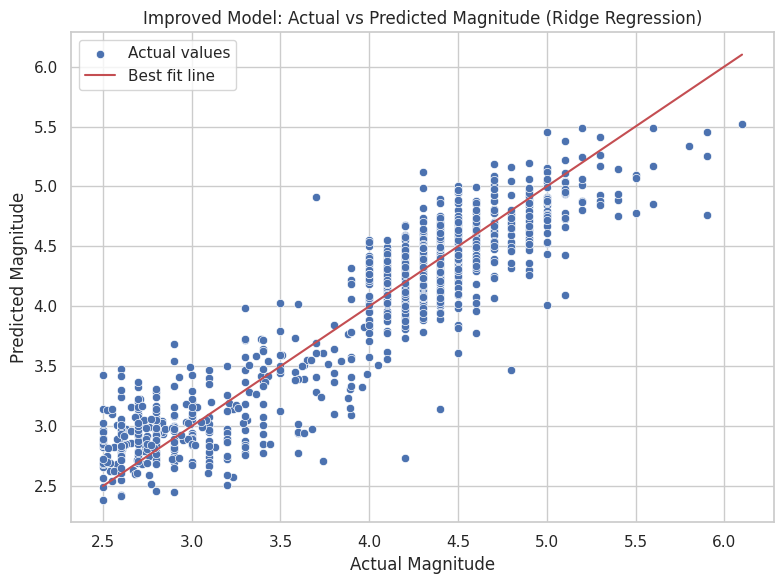

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Predict on the test data using the fitted Ridge model
y_pred = ridge.predict(X_test)

sns.scatterplot(x=y_test, y=y_pred ,label='Actual values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r',label='Best fit line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Improved Model: Actual vs Predicted Magnitude (Ridge Regression)")
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
print("R²:", r2_score(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))

R²: 0.8599174278775832
MSE: 0.09086421406705435


In [ ]:
mag_type={'shallow':df[df['depth'] < 50]['mag'],"deep":df[df['depth'] >300]['mag']}
data=pd.DataFrame(mag_type)
data.count()

data.mean()

,0
shallow,3.884069
deep,4.383624


In [ ]:
data.isnull().sum()
data=data.fillna(data.mean())
data

,shallow,deep
3,4.400000,4.383624
4,3.884069,4.400000
5,5.200000,4.383624
6,2.760000,4.383624
7,2.880000,4.383624
...,...,...
6380,4.200000,4.383624
6381,4.600000,4.383624
6382,4.200000,4.383624
6383,3.400000,4.383624


In [ ]:
co_rel=data['shallow'].corr(data['deep'],method='spearman')
co_rel

np.float64(0.00460796723972255)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# ... (your previous code to create 'data' DataFrame) ...

# Remove outliers from 'data'
z_scores = np.abs(stats.zscore(data[['shallow', 'deep']]))
data = data[(z_scores < 3).all(axis=1)]

# Now 'data' should have outliers removed. You can continue with further analysis:
print(data)
# ... (your further analysis using the updated 'data' DataFrame) ...

       shallow      deep
3     4.400000  4.383624
4     3.884069  4.400000
5     5.200000  4.383624
6     2.760000  4.383624
7     2.880000  4.383624
...        ...       ...
6380  4.200000  4.383624
6381  4.600000  4.383624
6382  4.200000  4.383624
6383  3.400000  4.383624
6385  3.700000  4.383624

[4329 rows x 2 columns]


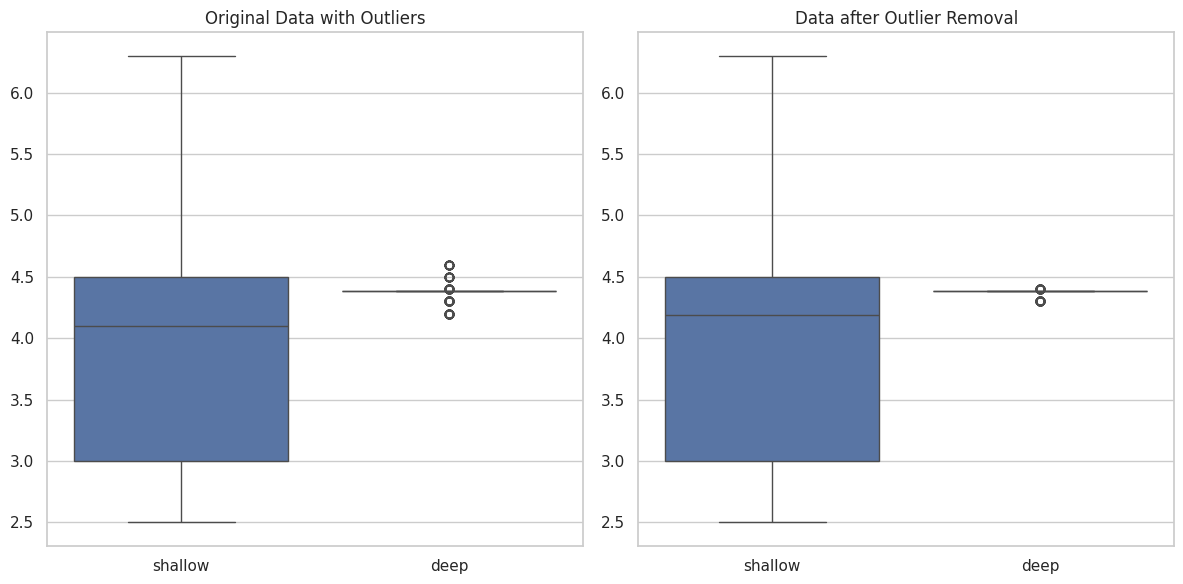

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your previous code to create 'data' DataFrame) ...

# Store the original data for comparison
original_data = data.copy()

# Remove outliers from 'data'
z_scores = np.abs(stats.zscore(data[['shallow', 'deep']]))
data = data[(z_scores < 3).all(axis=1)]

# Create subplots for before and after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original data
sns.boxplot(data=original_data, ax=axes[0])
axes[0].set_title('Original Data with Outliers')

# Plot data after outlier removal
sns.boxplot(data=data, ax=axes[1])
axes[1].set_title('Data after Outlier Removal')

plt.tight_layout()
plt.show()

In [ ]:
import

In [377]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Use Linear Regression
from sklearn.metrics import mean_squared_error, r2_score # Use regression metrics

# Assuming you have your 'data' DataFrame with 'mag' and 'magnitude_type' columns

# 1. Prepare the data:
X = data[['shallow']]  # Features (magnitude value)
y = data['deep']  # Target (magnitude type)

# 2. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model:
model = LinearRegression()  # Changed to LinearRegression
model.fit(X_train, y_train)

# 4. Make predictions on the test set:
y_pred = model.predict(X_test)

# 5. Evaluate the model's performance (using regression metrics):
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 6. Use the model to predict magnitude type for new magnitude values:
new_depth_values = [[45.0], [602], [78]]
predicted_types = model.predict(new_magnitude_values)

new_magnitude_values = [[4.5], [6.2], [7.8]]  # Example values
predicted_types = model.predict(new_magnitude_values)
print(f"Predicted types: {predicted_types}")

Mean Squared Error: 0.00012603724376691926
R-squared: -0.0008161166791773589
Predicted types: [4.38268899 4.38266814 4.38264852]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

